In [1]:
import anuga
from osgeo import gdal
from glob import glob
from affine import Affine
import geopandas as gpd

%matplotlib inline

# Allow inline jshtml animations
from matplotlib import rc
rc('animation', html='jshtml')

In [2]:
bounding_polygon= gpd.read_file('area/domain.shp')

# Elevation Data
topography_file = 'DEM.tif'
# topography_file= '/home/ZhiLi/CRESTHH/data/precip/imerg20170825S150000.tif'

# Resolution for most of the mesh
base_resolution = 10  # m^2


Figure files for each frame will be stored in _plot


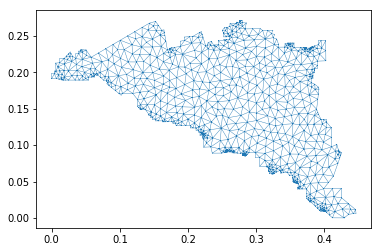

In [3]:
domain = anuga.create_domain_from_regions(
            list(bounding_polygon.exterior[0].coords),
            boundary_tags={'bottom': [0],},
            maximum_triangle_area=0.0001,
#             minimum_triangle_area=1
            
            )

# domain= anuga.create_domain_from_rectangular()

# Basic geometry and bounding polygon
# xleft   = -95.05
# xright  = -95.83
# ybottom = 29.79
# ytop    = 30.18

# point_sw = [xleft, ybottom]
# point_se = [xright, ybottom]
# point_nw = [xleft, ytop]    
# point_ne = [xright, ytop]

# bounding_polygon = [point_se,
#                     point_ne,
#                     point_nw,
#                     point_sw]



# domain= anuga.create_domain_from_regions(bounding_polygon,boundary_tags={'bottom': [0],},maximum_triangle_area=0.0005)

# domain= anuga.rectangular_cross_domain

domain.set_name('excessive_rain') # Name of sww file
dplotter = anuga.Domain_plotter(domain)  
plt.triplot(dplotter.triang, linewidth = 0.4);

In [4]:
print 'Number of elements:',domain.number_of_elements

Number of elements: 1411


In [5]:
from osgeo import gdal

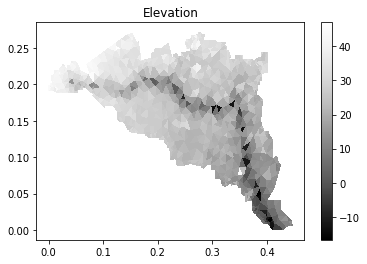

In [6]:
domain.set_quantity('elevation', filename=topography_file, location='centroids') # Use function for elevation
domain.set_quantity('friction', 0.3, location='centroids')                        # Constant friction 
domain.set_quantity('stage', expression='elevation', location='centroids')         # Dry Bed 
domain.set_quantity('SS0', 0, location='centroids')
domain.set_quantity('SI0', 0, location='centroids')
domain.set_quantity('W0', 0, location='centroids')
domain.set_quantity('RainFact', 0.5, location='centroids')
domain.set_quantity('Ksat', 0.5, location='centroids')
domain.set_quantity('WM', 0.5, location='centroids')
domain.set_quantity('B', 0.5, location='centroids')
domain.set_quantity('IM', 0.5, location='centroids')
domain.set_quantity('KE', 0.5, location='centroids')
domain.set_quantity('coeM', 0.5, location='centroids')
domain.set_quantity('expM', 0.5, location='centroids')
domain.set_quantity('coeR', 0.5, location='centroids')
domain.set_quantity('coeS', 0.5, location='centroids')
domain.set_quantity('KS', 0.5, location='centroids')
domain.set_quantity('KI', 0.5, location='centroids')
domain.set_evap_dir('/hydros/MengyuChen/pet', pattern='cov_et17%m%d.asc', freq='1D')
domain.set_precip_dir('/home/ZhiLi/CRESTHH/data/precip',pattern='nimerg%Y%m%dS%H%M%S.tif', freq='2M')
domain.set_timestamp('20170825180000', format='%Y%m%d%H%M%S')
domain.set_time_interval('1H')

plt.tripcolor(dplotter.triang, 
              facecolors = dplotter.elev, 
              cmap='Greys_r')
plt.colorbar();
plt.title("Elevation");

In [7]:
import datetime

In [8]:
Br = anuga.Reflective_boundary(domain)
Bt = anuga.Transmissive_boundary(domain)

domain.set_boundary({'bottom':   Bt,
                     'exterior': Br})

In [ ]:
domain.get_quantity('excess_rain').plot_quantity()

In [10]:
datetime.datetime(2020,1,1,3,0,0).timetuple()

time.struct_time(tm_year=2020, tm_mon=1, tm_mday=1, tm_hour=3, tm_min=0, tm_sec=0, tm_wday=2, tm_yday=1, tm_isdst=-1)

evolving elements: 1411


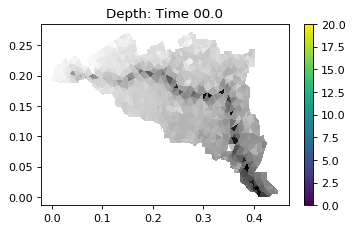

    operator_0: Integrating the boundary flux
Time = 0.0000, steps=0 (2s)
 
    Volume V is: 1.2404753005086773e-17
    Boundary Flux integral BF:  [0.]
    (rate + inlet) Fractional Step volume integral FS:  0.0
    V - BF - FS - InitialVolume : [0.]
 
integral =  1.2404753005086773e-17


In [ ]:
# Rain = anuga.Quantity(domain, name='Rain')
# ET= anuga.Quantity(domain, name='ET')
# forcing_op= anuga.Rate_operator(domain, rate=Rain+ET)
# rain_op = anuga.Rate_operator(domain, rate = Rain)
# et_op = anuga.Rate_operator(domain, rate= Evap)
# Rain= anuga.Rate_operator(domain, rate=lambda t: 5 if t<5 else 10)
for i,t in enumerate(domain.evolve(yieldstep=3600, duration=3600*6)):
#     current_rain_file = sorted(glob(external_dir+'/*.tif'))[i]
#     print(current_rain_file)
#     Rain.set_values_from_utm_grid_file(current_rain_file, location='centroids')
#     ET.set_values_from_utm_grid_file(current_rain_file, location='centroids')
    dplotter.plot_depth_frame()
    dplotter.save_depth_frame(vmin=0.0, vmax=1)
    domain.print_operator_timestepping_statistics()
    domain.print_timestepping_statistics()
    domain.report_water_volume_statistics()

    stage = domain.get_quantity('stage')
    elev  = domain.get_quantity('elevation')
    height = stage - elev
    print 'integral = ', height.get_integral()    
# Read in the png files stored during the evolve loop
dplotter.make_depth_animation() 

In [ ]:
swwfile = 'excessive_rain_para.sww'
splotter = anuga.SWW_plotter(swwfile)


# Plot Depth and Speed at the last time slice
plt.subplot(121)
splotter.triang.set_mask(None)
plt.tripcolor(splotter.triang, 
              facecolors = splotter.depth[-1,:], 
              cmap='viridis')

plt.title("Depth")


plt.subplot(122)
splotter.triang.set_mask(None)
plt.tripcolor(splotter.triang, 
              facecolors = splotter.speed[-1,:], 
              cmap='viridis')

plt.title("Speed");


In [ ]:
swwfile = 'excessive_rain_para.sww'
splotter = anuga.SWW_plotter(swwfile)


# Plot Depth and Speed at the last time slice
plt.subplot(121)
splotter.triang.set_mask(None)
plt.tripcolor(splotter.triang, 
              facecolors = splotter.depth[-1,:], 
              cmap='viridis')
plt.colorbar()
plt.title("Depth")


plt.subplot(122)
splotter.triang.set_mask(None)
plt.tripcolor(splotter.triang, 
              facecolors = splotter.speed[-1,:], 
              cmap='viridis')
plt.colorbar()
plt.title("Speed");


In [ ]:
sys.path.append('/home/ZhiLi/CRESTHH')
import crest_core

In [ ]:
Rain= 1000;
Evap= 1.6;
RI =0;
RS =0;
SS0 =1.0;
SI0= 2.0;
W0= 5;
RainFact= 0.5;
Ksat= 0.2;
WM=200;
B= 0.4;
IM= 0.2;
KE= 0.6;
coeM= 0.2;
expM= 3;
coeR= 0.6;
coeS= 0.4;
KS= 0.8;
KI= 0.3;
timestep=1;

crest_core.model(Rain, Evap, RI, RS, SS0, SI0, W0,
                RainFact, Ksat, WM, B, IM, KE, coeM,
                expM, coeR, coeS, KS, KI, timestep)

In [ ]:
import datetime


In [ ]:
datetime.timedelta(hours=1) * 2